Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import math
import random
import os
from numpy.random import random
from numpy import pi
from math import log, sqrt, pi, exp
from scipy.stats import norm
import matplotlib.pyplot as plt 
from matplotlib import rcParams

# Question 1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from numpy.random import random
from numpy import pi
import os

def Pi_Calcu(N):
#Draw a square with centre as origin
    squareX = [1,-1,-1,1,1]
    squareY = [1,1,-1,-1,1]
    circleX,circleY = [],[]

#Draw a circle with centre as origin    
    for i in range(361):
        circleX.append(np.cos(np.pi*i/180)) #since x = rcosθ
        circleY.append(np.sin(np.pi*i/180)) #since y = rsinθ

#To count number of points in circle and in square, the value of itteration (N), value of pi for that iteration, the error from actual value of pi
    circle_X,circle_Y,square_X,square_Y,Iteration,CurrentPi,error = [],[],[],[],[],[],[]
    circle_point = 0

#Generate random values of x and y between -1 and 1
    for i in range (N):
        x = 2*(random()-0.5)
        y = 2*(random()-0.5)
        dist = np.sqrt(x**2+y**2)
        Iteration.append(i)
#If the point lies in the cirle increase the circle point by 1 and append that value of x and y         
        if dist <= 1:
            circle_point +=1
            circle_X.append(x)
            circle_Y.append(y)
        else:
            square_X.append(x)
            square_Y.append(y)
#Since value of pi = 4*number of point in circle/number of point in square
        CurrentPi.append(4*circle_point/(i+1))
        error.append(((4*circle_point/(i+1)) - pi)/pi)

    piValue = 4*circle_point / N
    piError = abs(((piValue-pi)/pi))
    
#printing statements
    print(f'The number of itterations are {N}\n')
    print(f'The value of pi estimated using Monte Carlo is {piValue} ')
    print(f'The error in calculation using Monte Carlo is {piError} \n')

#Plotting the point for each itteration in a graph;it shows where the point lies
    rcParams['figure.figsize'] = 5, 5
    plt.plot(squareX,squareY,color='black')
    plt.plot(circleX,circleY,color='black')
    plt.scatter(circle_X,circle_Y,color='#05e4fc',marker=".")
    plt.scatter(square_X,square_Y,color='#055ffa',marker=".")
    plt.title('\n Random point wrt square and circle')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
#Plotting Iteration (number of runs) vs the current value of pi
    rcParams['figure.figsize'] = 12,9
    plt.plot(Iteration,CurrentPi,color='#055ffa')
    plt.axhline(y=pi,color='black',ls='--') #this represents the actual value of pi
    plt.axis([0,N,2.8,3.4])
    plt.title('\nEstimate of pi vs Number of Iteration')
    plt.xlabel('Iteration Number')
    plt.ylabel('Estimate for pi')
    plt.show()
    
#Plotting the Iteration (number of runs) vs the error graph
    rcParams['figure.figsize'] = 8,5
    plt.plot(Iteration,error,color='red')
    plt.title('\n The error for each iteration is')
    plt.xlabel('Iteration Number')
    plt.ylabel('Error')
    plt.show()


Estimating pi value for 10 itteration

The number of itterations are 10

The value of pi estimated using Monte Carlo is 1.2 
The error in calculation using Monte Carlo is 0.6180281365794512 



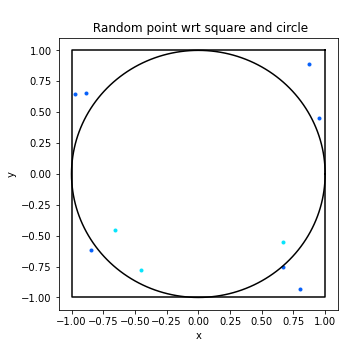

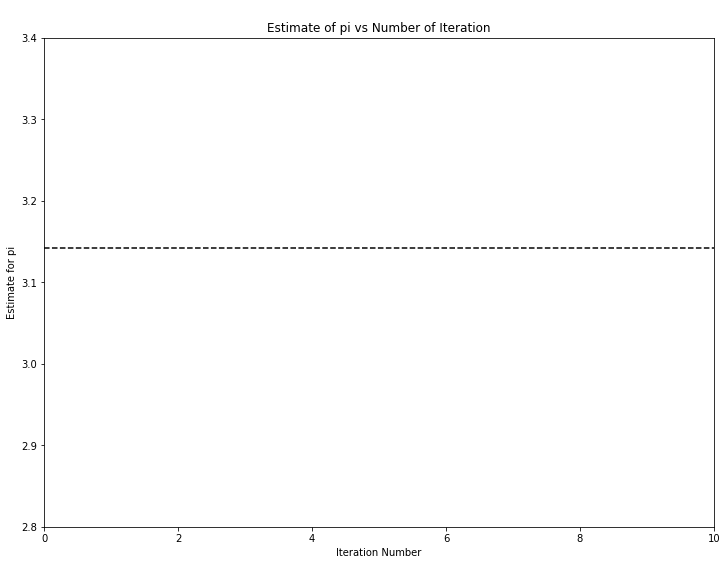

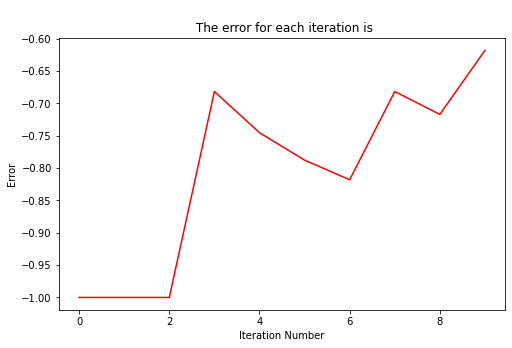

In [4]:
Pi_Calcu(10)

Estimating pi value for 500 itterations

The number of itterations are 500

The value of pi estimated using Monte Carlo is 3.192 
The error in calculation using Monte Carlo is 0.016045156698659916 



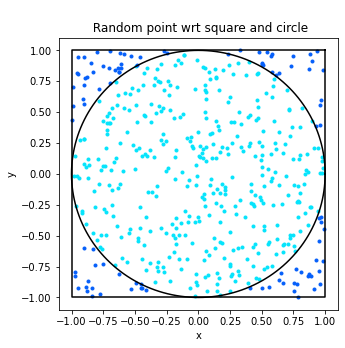

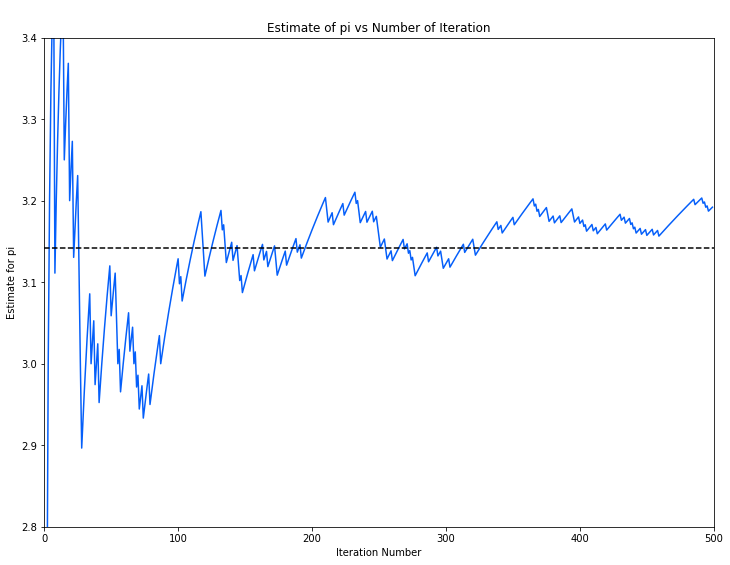

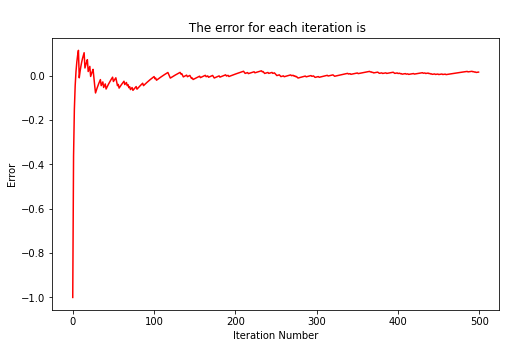

In [5]:
Pi_Calcu(500)

Estimating pi value for 5000 itterations

The number of itterations are 5000

The value of pi estimated using Monte Carlo is 3.1632 
The error in calculation using Monte Carlo is 0.0068778319765666245 



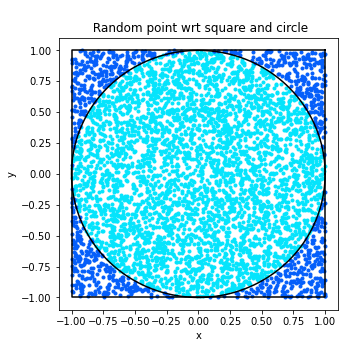

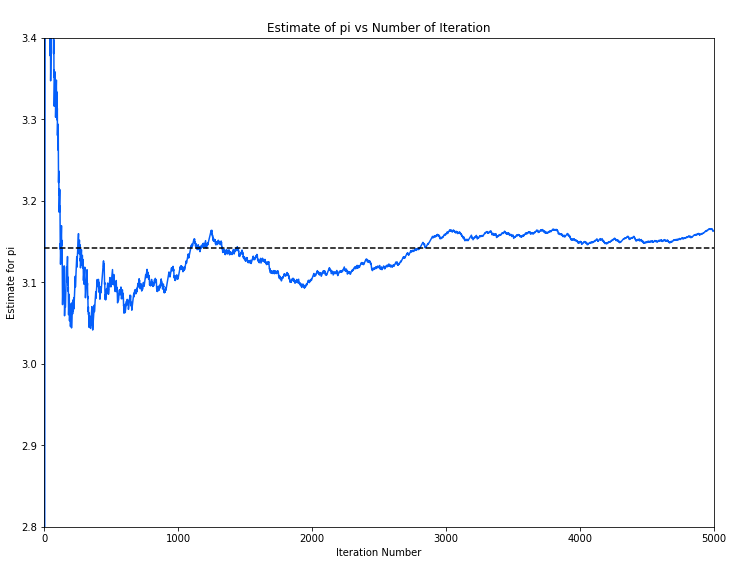

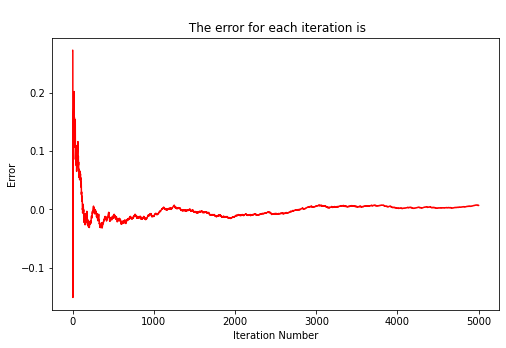

In [7]:
Pi_Calcu(5000)

Estimation pi value for 10000 iterations

The number of itterations are 10000

The value of pi estimated using Monte Carlo is 3.1452 
The error in calculation using Monte Carlo is 0.001148254025258458 



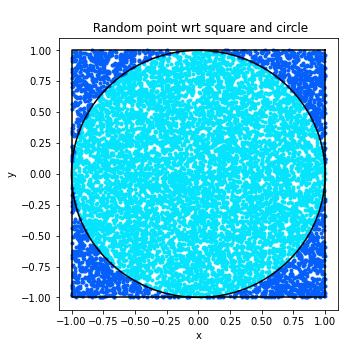

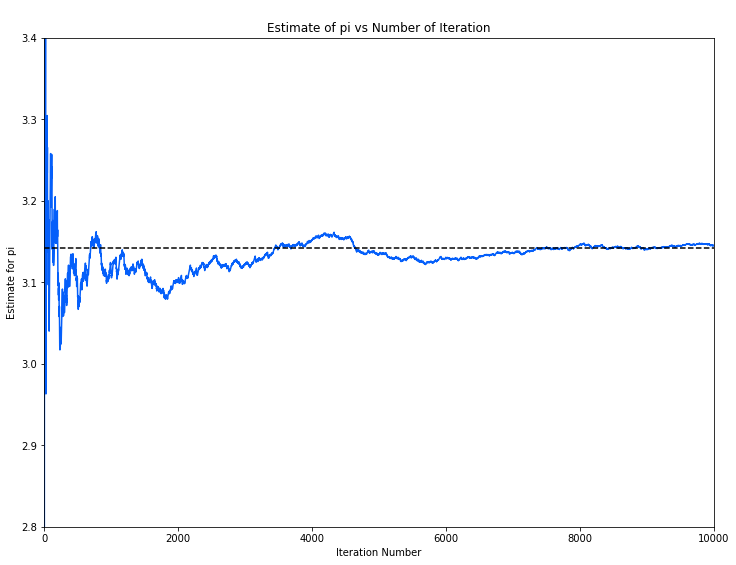

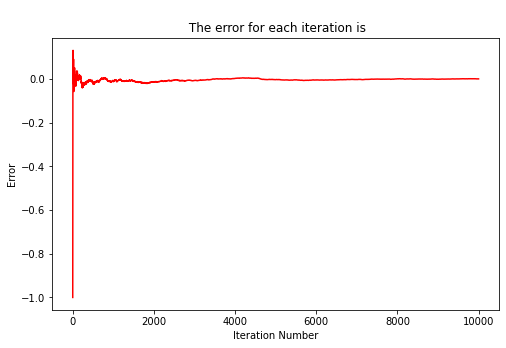

In [8]:
Pi_Calcu(10000)

# Question 2 (a)


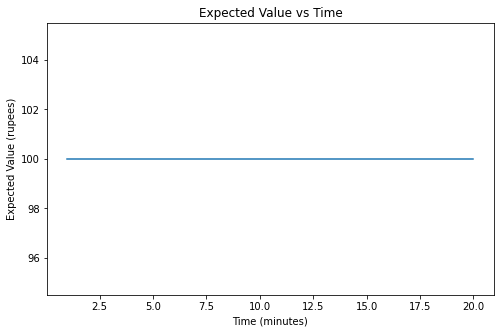

In [9]:
# Expected Value Calculation
S = 100 # Initial Stock Price
tot_pos = [100] # list of total possible outcomes after every minute
new = [100] # temporary list to append the possible values after every minute to the tot_pos
x = [] # X-axis values in the graph denote Time in minutes
y = [] # Y-axis values in the graph denote Expected Value in rupees

for i in range(1,21):
    new = []
    for var in tot_pos:
        new.append(var+1)   # Change of +1 in the stock price
        new.append(var-1)   # Change of -1 in the stock price
    tot_pos = new
    x.append(i)
    y.append(np.mean(tot_pos))

#Plotting the graph of Expected Value vs Time(in minutes).
plt.plot(x,y)
# naming the x axis and y axis
plt.xlabel('Time (minutes)')
plt.ylabel('Expected Value (rupees)')
# giving a title to graph
plt.title('Expected Value vs Time')
#Resizing the graph
rcParams['figure.figsize'] = 12, 9
# function to show the plot
plt.show()

# Question 2 (b)

In [14]:
import random
def Prob(N):
    flag = 0 #count variable
    failure = 0 
    success = 0
    S = 100
    actual_value = 2/3
    Iteration,ans,ans1 = [],[],[] #list to store iteration and the probability for that iteration
   
    for i in range(N):
        while(S != 102):
          #Generating a random number between 0 and 1
            x = random.uniform(0, 1)
            if x > 0.5:
                S +=1
            else:
                S = S-1
            if(S == 96):
                flag = 1
                break
        if(flag == 1):
            failure = failure+1
        else:
            success = success+1
        Iteration.append(i)
        S =  100
        flag =0
        ans.append(success/(success+failure))
        calc_mean = np.mean(ans)
        calc_meanx =  abs(calc_mean - actual_value)
        
        if(i>3000):
#Since our tolerance limit is 10^-2
            if (calc_meanx/actual_value) <= 0.01 :
                ans1.append(i) 
    
    print(f"Number of runs required for a converged vale: {ans1[0]} \n")
    print(f"The estimated probability is: {np.mean(calc_mean)}")
    
    #plotting the graph between Iteration and the probability for that iteration
    rcParams['figure.figsize'] = 10,8
    plt.plot(Iteration , ans,color='#055ffa')
    plt.axis([0,N,0.5,1.0])
    plt.axhline(y=2/3,color='black',ls='--')
    plt.title('Probability vs Number of Runs Graph')
    plt.xlabel('Number of Runs')
    plt.ylabel('Probability')
    plt.show()

Number of runs required for a converged vale: 3001 

The estimated probability is: 0.664768773499158


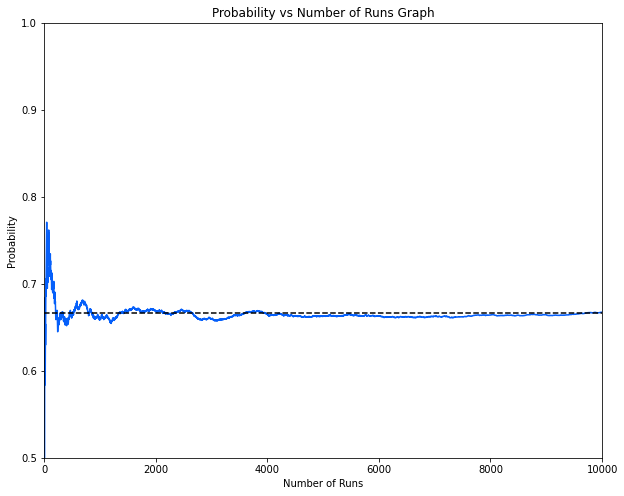

In [17]:
Prob(10000)
#if the cell shows list out of index, please run it again

# Question 3

Calculating the option value

In [18]:
#Calculation the option price using the Black Scholes Model
x = 200 
K = 180
r= 0.02
sigma = 0.15
T = 1/12 #30 days
#Above values were given in the question
d1 = (np.log(x/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))
d2 = d1-sigma*sqrt(T)
Call_Option = x*norm.cdf(d1)-K*exp(-r*T)*norm.cdf(d2)
print(f"The option price using Black Scholes Model is: {Call_Option}")

The option price using Black Scholes Model is: 20.317700916589644


Plotting the graph between Call option with respect to time as time varies from 1 year to 12 years

Text(0.5, 1.0, 'Call option Premium vs Time')

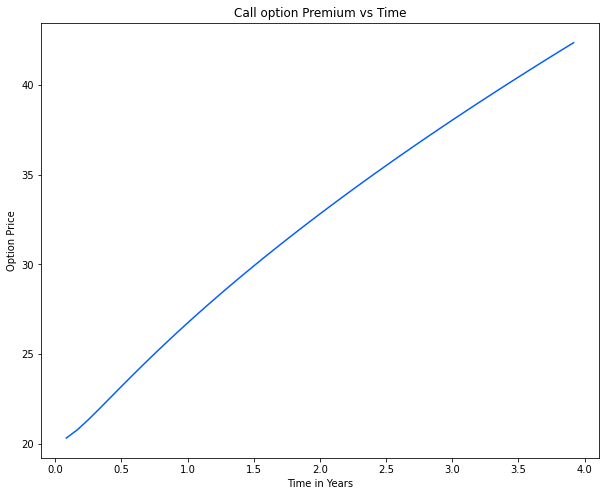

In [19]:
Iteration = []
Call = []
for i in range (1,48):
    x = 200
    K = 180
    r= 0.02
    sigma = 0.15
    T = i/12
#Storing the value of T in a list
    Iteration.append(T)
    d1 = (np.log(x/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))
    d2 = d1-sigma*sqrt(T)
    y = x*norm.cdf(d1)-K*exp(-r*T)*norm.cdf(d2)
#Storing the value of call option for each value of time
    Call.append(y)
plt.plot(Iteration,Call,color = '#055ffa')
#Where 0.5 represents 6 months
plt.xlabel('Time in Years')
plt.ylabel('Option Price')
plt.title('Call option Premium vs Time')


# Question 4

In [20]:
# Monte Carlo Simulation
S = 200 # Spot price at t=0
K = 180 # Strike Price
T = 1/12 # in year
r = 0.02 # Risk-free rate considering risk-neutrality 
sigma = 0.15 # Implied Volatility
N = 10000 # Total no of paths
M = 240 # Time steps
dt = T/M # distrete timestep variable for Brownian Motion of daily prices = (1/12)*240

In [21]:
# the certain part of Brownian Motion
drift = (r-(sigma**2)/2)*dt 

#the uncertain part of Brownian Motion
a = sigma*np.sqrt(dt)
x = np.random.normal(0,1,(N,M)) #no of timesteps on X-axis and no. of paths on Y-axis
Smat = np.zeros((N,M)) # matrix for simulating stock prices for N no. of simulations and total M  timesteps
Smat[:,0] += S # Spot price at t=0 is S

for i in range(1,M):
    Smat[:,i] += Smat[:,i-1]*np.exp(drift + a*x[:,i])

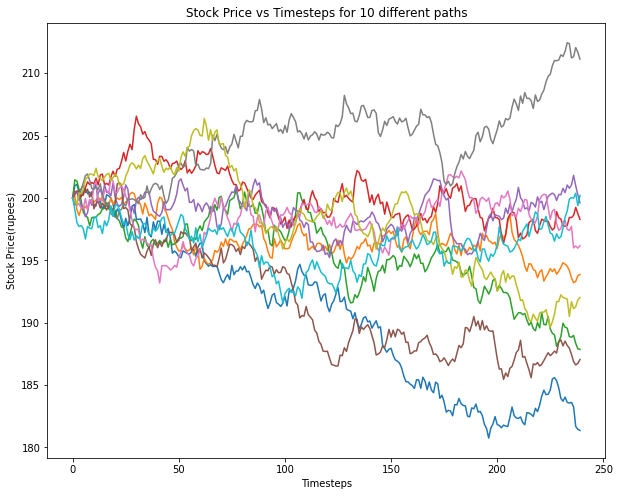

In [22]:
#Taking transpose of Smat
stockPrice = np.zeros((M,N))
stockPrice = np.transpose(Smat)

#Plotting the graph
plt.plot(stockPrice[:,:10])
# naming the x axis and y axis
plt.xlabel('Timesteps')
plt.ylabel('Stock Price(rupees)')
# giving a title to graph
plt.title('Stock Price vs Timesteps for 10 different paths')
#Resizing the graph
rcParams['figure.figsize'] = 12, 9
# function to show the plot
plt.show()

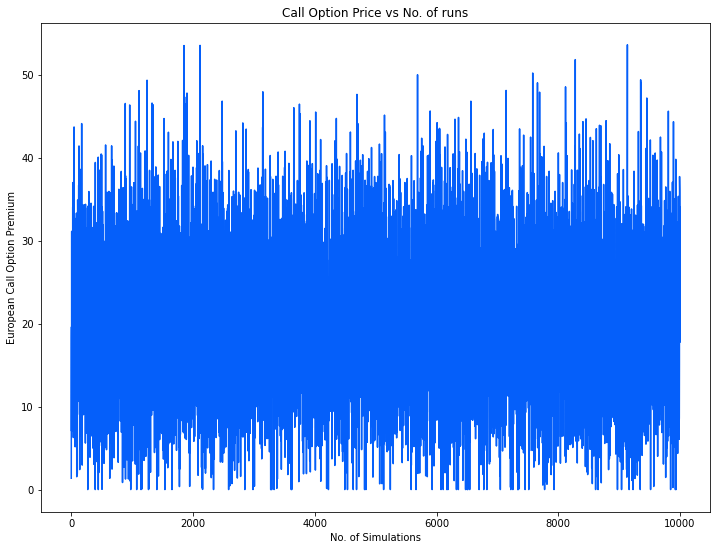

In [23]:
C = Smat[:,-1] - K # all paths/rows of the last timestep
ind = []
for i in range(len(C)):
    ind.append(i)
    if C[i]<0:
        C[i] = 0
    else: C[i] = C[i]

# plotting the points 
plt.plot(ind,C,color="#055ffa")
# naming the x axis
plt.xlabel('No. of Simulations')
# naming the y axis
plt.ylabel('European Call Option Premium')
# giving a title to graph
plt.title('Call Option Price vs No. of runs')
#Resizing the graph
rcParams['figure.figsize'] = 12, 9
# function to show the plot
plt.show()

In [24]:
payoffCall = np.mean(C)

#Discounting the payoff to its present value to get the premium of the European Call Option
premiumCall = payoffCall*np.exp(-r*T)
premiumCall

20.22989146114757